## Steps in Modelling a Tensor

### 1. Creating a model
    
    Defining input,output and hidden layers

    Improvements that can be made at this step:
    
    * Add more layers
    * Increase number of hidden layers
    * Change activation function for each layer

### 2. Compiling the model
    
    Define the loss function, the optimizer and evaluation metrics

     Improvements that can be made at this step:
     
     * Change the optimizer
     * Change learning rate of the optimizer 

### 3. Fitting the model 
    
    Let the model find pattern between features and labels
    - Epoch : How many times the model will go through all of the training examples
    
     Improvements that can be made at this step:

     * More samples
     * More iterations (Epoch)

## Evaluating a model

### 1. Visualize, Visualize and VISUALIZE
* The Training Data
 
    1. What does the data look like? (Distribution, 
 outliers,etc)

* The Model itself
    
    1. What does the model look like?

* The training of the model 
    1. How does the model perform while it learns?
    (During training)
* The predictions
    1. Predictions against the ground truth



    1. Total Params : Total number of parameters in the model
    2. Trainable parameters : Parameters the model can update as it trains
    3. Non-trainable parameters: No updated during training ( Typically when we bring patterns or parameters from other models during transfer learning)


## Weight and Bias










In [ ]:
import tensorflow as tf
print(tf.__version__)

2.5.0


[1 2 3 4 5]
[3 4 5 6 7]


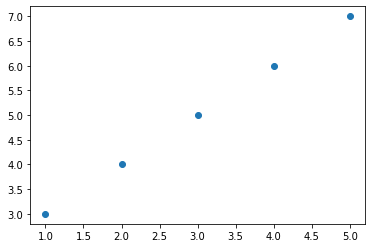

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

X = np.array([1,2,3,4,5])
print(X)
y = np.array([3,4,5,6,7])
print(y)

plt.scatter(X,y)

In [ ]:
X = tf.constant(X)
X.shape
y = tf.constant(y)


In [ ]:
# Set random seem
tf.random.set_seed(42)

# 1. Create a model using the Sequential API
model = tf.keras.Sequential([
                             tf.keras.layers.Dense(100,activation="relu"),
                             tf.keras.layers.Dense(100,activation="relu"),
                             tf.keras.layers.Dense(100,activation="relu"),
                             tf.keras.layers.Dense(1)
])

# 2. Compile the model
model.compile(loss=tf.keras.losses.mae, 
              optimizer=tf.keras.optimizers.Adam(lr=0.0001),
              metrics=["mae"])
# 3. Fit the model 
model.fit(X,y,epochs=1000)

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/optimizer_v2/optimizer_v2.py:375: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


Epoch 1/1000
1/1 [==============================] - 1s 785ms/step - loss: 4.9225 - mae: 4.9225
Epoch 2/1000
1/1 [==============================] - 0s 11ms/step - loss: 4.9037 - mae: 4.9037
Epoch 3/1000
1/1 [==============================] - 0s 7ms/step - loss: 4.8850 - mae: 4.8850
Epoch 4/1000
1/1 [==============================] - 0s 5ms/step - loss: 4.8666 - mae: 4.8666
Epoch 5/1000
1/1 [==============================] - 0s 9ms/step - loss: 4.8492 - mae: 4.8492
Epoch 6/1000
1/1 [==============================] - 0s 7ms/step - loss: 4.8318 - mae: 4.8318
Epoch 7/1000
1/1 [==============================] - 0s 9ms/step - loss: 4.8145 - mae: 4.8145
Epoch 8/1000
1/1 [==============================] - 0s 8ms/step - loss: 4.7971 - mae: 4.7971
Epoch 9/1000
1/1 [==============================] - 0s 14ms/step - loss: 4.7797 - mae: 4.7797
Epoch 10/1000
1/1 [==============================] - 0s 10ms/step - loss: 4.7623 - mae: 4.7623
Epoch 11/1000
1/1 [==============================] - 0s 4ms/step

In [ ]:
y_pred = model.predict([1])

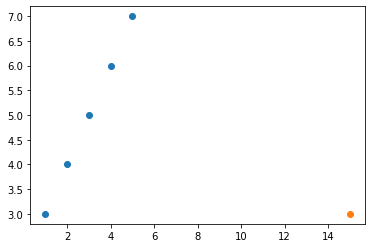

In [ ]:
plt.scatter(X,y)
plt.scatter(15,y_pred)

In [ ]:
model.summary()/content/optimized_model_savedModel_format

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 100)               200       
_________________________________________________________________
dense_1 (Dense)              (None, 100)               10100     
_________________________________________________________________
dense_2 (Dense)              (None, 100)               10100     
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 101       
Total params: 20,501
Trainable params: 20,501
Non-trainable params: 0
_________________________________________________________________


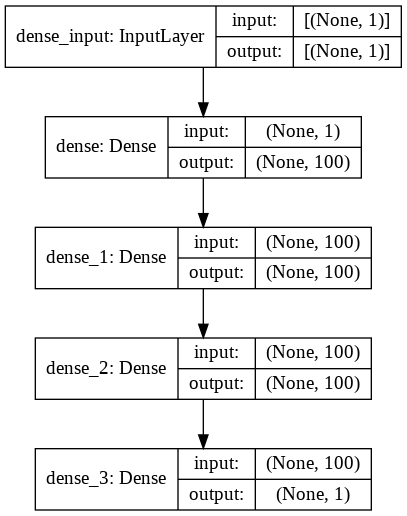

In [ ]:
# Visualizing our model
from tensorflow.keras.utils import plot_model

plot_model(model,show_shapes=True)


In [ ]:
# Plotting function
X_train=X
y_train=y
X_test=[8,9,10]
y_test=[10,11,12]
def plot_predictions(train_data=X_train,
                     train_labels=y_train,
                     test_data=X_test,
                     test_labels=y_test,
                     predictions=y_pred):
    """
    Plots training and test data for comparison
    """

    plt.figure(figsize=(6,6))
    # Plot training data in green
    plt.scatter(train_data,train_labels,c='g',label="Training data")
    # Plot test data in red
    plt.scatter(test_data,test_labels,c='r',label="Test data")
    # Plot model's prediction
    plt.scatter(test_data,predictions,c='b',label="Predictions")
    # Show the legend
    plt.legend()

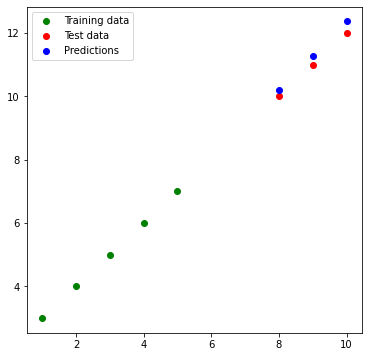

In [ ]:
plot_predictions(X_train,y_train,X_test,y_test,model.predict(X_test))

In [ ]:
y_pred = model.predict(X_test)
y_pred = tf.squeeze(y_pred)
y_pred

<tf.Tensor: shape=(3,), dtype=float32, numpy=array([10.209682, 11.284359, 12.35865 ], dtype=float32)>

In [ ]:
mae = tf.metrics.mean_absolute_error(y_test,y_pred)
print("MAE ::",mae)
mse = tf.metrics.mean_squared_error(y_test,y_pred)
print ("MSE ::",mse)

MAE :: tf.Tensor(0.28423056, shape=(), dtype=float32)
MSE :: tf.Tensor(0.08448557, shape=(), dtype=float32)


## Save a Model

In [ ]:
model.save("optimized_model_savedModel_format")

INFO:tensorflow:Assets written to: optimized_model_savedModel_format/assets


In [ ]:
model.save("optimized_model.h5")

#Loading a Model

In [ ]:
model2 = tf.keras.models.load_model("/content/optimized_model_savedModel_format")

In [ ]:
model2.predict([5])

array([[6.999721]], dtype=float32)